# Gas Price Analysis

The average price of gasoline around the world is 1.47 U.S. Dollars per liter. As a general rule, richer countries have higher prices while poorer countries and the countries that produce and export oil have significantly lower prices. The differences in prices across countries are mainly due to the various taxes and subsidies for gasoline. All countries have access to the same petroleum prices of international markets but then decide to impose different taxes. Source https://www.globalpetrolprices.com/gasoline_prices/

GDP is the measurement of goods and services in the economy. It could be considered a descriptor of the overall health of an economy. GDP = Consumer Spending + Investment + Government spend + Net Exports. 

Research question: how does daily oil_consumption and yearly gallons_percapita have an impact on price per gallon?

In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
gas_prices= pd.read_csv("Data/petrol_dataset_june_23_2022_v2.csv",encoding='latin-1')
gas_prices.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8


# eda

In [3]:
gas_prices.isnull().sum()

S#                                      0
Country                                 0
Daily Oil Consumption (Barrels)         0
World Share                             0
Yearly Gallons Per Capita               0
Price Per Gallon (USD)                  0
Price Per Liter (USD)                   0
Price Per Liter (PKR)                   0
GDP Per Capita ( USD )                  0
Gallons GDP Per Capita Can Buy          0
xTimes Yearly Gallons Per Capita Buy    0
dtype: int64

In [4]:
gas_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S#                                    181 non-null    int64  
 1   Country                               181 non-null    object 
 2   Daily Oil Consumption (Barrels)       181 non-null    object 
 3   World Share                           181 non-null    object 
 4   Yearly Gallons Per Capita             181 non-null    float64
 5   Price Per Gallon (USD)                181 non-null    float64
 6   Price Per Liter (USD)                 181 non-null    float64
 7   Price Per Liter (PKR)                 181 non-null    float64
 8   GDP Per Capita ( USD )                181 non-null    object 
 9   Gallons GDP Per Capita Can Buy        181 non-null    object 
 10  xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(4), int6

In [5]:
gas_prices.describe()

,S#,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),xTimes Yearly Gallons Per Capita Buy
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,332.006630,5.695691,1.505138,318.219227,14.204420
std,52.394338,436.558735,4.370484,1.154575,244.192081,48.613866
min,1.000000,2.200000,0.080000,0.020000,4.650000,1.000000
25%,46.000000,53.900000,4.150000,1.100000,232.020000,6.000000
50%,91.000000,180.200000,5.280000,1.400000,295.040000,9.000000
75%,136.000000,424.600000,6.760000,1.790000,377.740000,12.000000
max,181.000000,3679.500000,54.890000,14.500000,3066.750000,654.000000


# DATA CLEANING

In [6]:
gas_prices =gas_prices.drop(["S#","Price Per Liter (PKR)"],axis = 1) 
gas_prices

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,United States,"19,687,287",20%,934.3,5.19,1.37,"63,414","12,218",13
1,China,"12,791,553",13%,138.7,5.42,1.43,"10,435","1,925",14
2,India,"4,443,000",5%,51.4,5.05,1.33,"1,901",376,7
3,Japan,"4,012,877",4%,481.5,4.69,1.24,"40,193","8,570",18
4,Russia,"3,631,287",4%,383.2,3.41,0.90,"10,127","2,970",8
...,...,...,...,...,...,...,...,...,...
176,Belize,"4,001",0%,166.5,6.68,1.76,"4,436",664,4
177,Niue,51,0%,484.4,11.43,3.02,"15,586","1,364",3
178,Saint Pierre & Miquelon,660,0%,1705.1,8.27,2.19,"34,900","4,220",2
179,Montserrat,400,0%,1231.1,4.57,1.21,"12,589","2,755",2


In [7]:
gas_prices.rename(columns = {'Country' : 'country','Daily Oil Consumption (Barrels)':'daily_oil_consumption_barrels',
                     'World Share':'world_share','Yearly Gallons Per Capita':'yearly_gallons_per_capita',
                   'Price Per Gallon (USD)':'price_per_gallon_usd',
                    'Price Per Liter (USD)': 'price_per_liter_usd','GDP Per Capita ( USD )':'gdp_per_capita_usd',
                    'Gallons GDP Per Capita Can Buy':'gallons_gdp_per_capita_can_buy',
                    'xTimes Yearly Gallons Per Capita Buy':'yearly_gallons_per_capita_can_buy'}, inplace = True)   

In [8]:
gas_prices['world_share'] = gas_prices['world_share'].str.replace('%', '')
gas_prices['world_share'] = gas_prices['world_share'].astype(float) / 100
gas_prices.head()

,country,daily_oil_consumption_barrels,world_share,yearly_gallons_per_capita,price_per_gallon_usd,price_per_liter_usd,gdp_per_capita_usd,gallons_gdp_per_capita_can_buy,yearly_gallons_per_capita_can_buy
0,United States,"19,687,287",0.20,934.3,5.19,1.37,"63,414","12,218",13
1,China,"12,791,553",0.13,138.7,5.42,1.43,"10,435","1,925",14
2,India,"4,443,000",0.05,51.4,5.05,1.33,"1,901",376,7
3,Japan,"4,012,877",0.04,481.5,4.69,1.24,"40,193","8,570",18
4,Russia,"3,631,287",0.04,383.2,3.41,0.90,"10,127","2,970",8


In [9]:
str_cols = ['daily_oil_consumption_barrels','gdp_per_capita_usd','gallons_gdp_per_capita_can_buy']

for c in str_cols:
    gas_prices[c] = gas_prices[c].str.replace(',', '')
    print(c)  

daily_oil_consumption_barrels
gdp_per_capita_usd
gallons_gdp_per_capita_can_buy


In [10]:
gas_prices['daily_oil_consumption_barrels'] = gas_prices['daily_oil_consumption_barrels'].astype(int)
gas_prices.head()

,country,daily_oil_consumption_barrels,world_share,yearly_gallons_per_capita,price_per_gallon_usd,price_per_liter_usd,gdp_per_capita_usd,gallons_gdp_per_capita_can_buy,yearly_gallons_per_capita_can_buy
0,United States,19687287,0.20,934.3,5.19,1.37,63414,12218,13
1,China,12791553,0.13,138.7,5.42,1.43,10435,1925,14
2,India,4443000,0.05,51.4,5.05,1.33,1901,376,7
3,Japan,4012877,0.04,481.5,4.69,1.24,40193,8570,18
4,Russia,3631287,0.04,383.2,3.41,0.90,10127,2970,8


# EDA

In [11]:
gas_prices.dtypes

country                               object
daily_oil_consumption_barrels          int32
world_share                          float64
yearly_gallons_per_capita            float64
price_per_gallon_usd                 float64
price_per_liter_usd                  float64
gdp_per_capita_usd                    object
gallons_gdp_per_capita_can_buy        object
yearly_gallons_per_capita_can_buy      int64
dtype: object

Text(0.5, 1.0, 'Correlation Matrix')

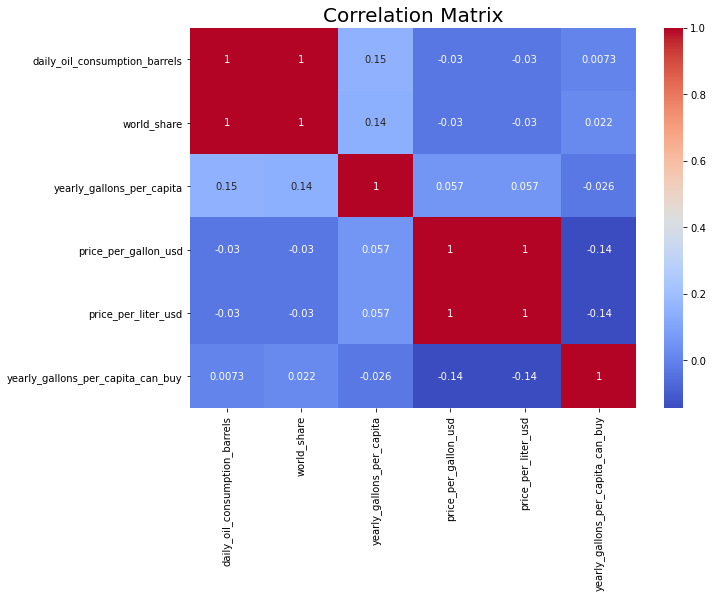

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(gas_prices.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix', fontsize =20)

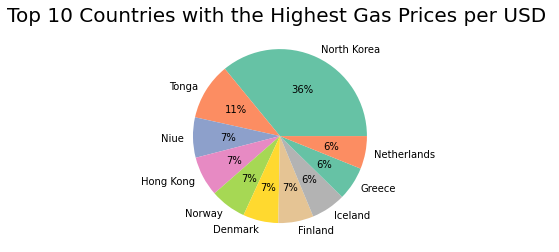

In [13]:
top_ten = gas_prices.nlargest(10,'price_per_gallon_usd')
palette_color = sns.color_palette("Set2")
  
plt.pie(top_ten['price_per_gallon_usd'], labels=top_ten['country'], colors=palette_color,autopct='%.0f%%')
plt.title("Top 10 Countries with the Highest Gas Prices per USD ", fontsize =20)
plt.show()

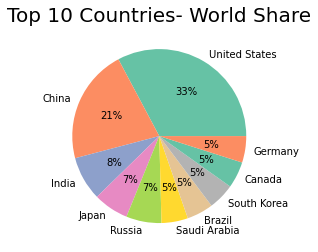

In [14]:
top_ten_shares = gas_prices.nlargest(10,['world_share'])
palette_color = sns.color_palette("Set2")
plt.pie(top_ten_shares['world_share'], labels = top_ten_shares['country'], colors=palette_color, autopct='%.0f%%', normalize = True)
plt.title("Top 10 Countries- World Share", fontsize =20)

plt.show()





Text(0.5, 1.0, 'Top Ten Countries - Highest Consumption')

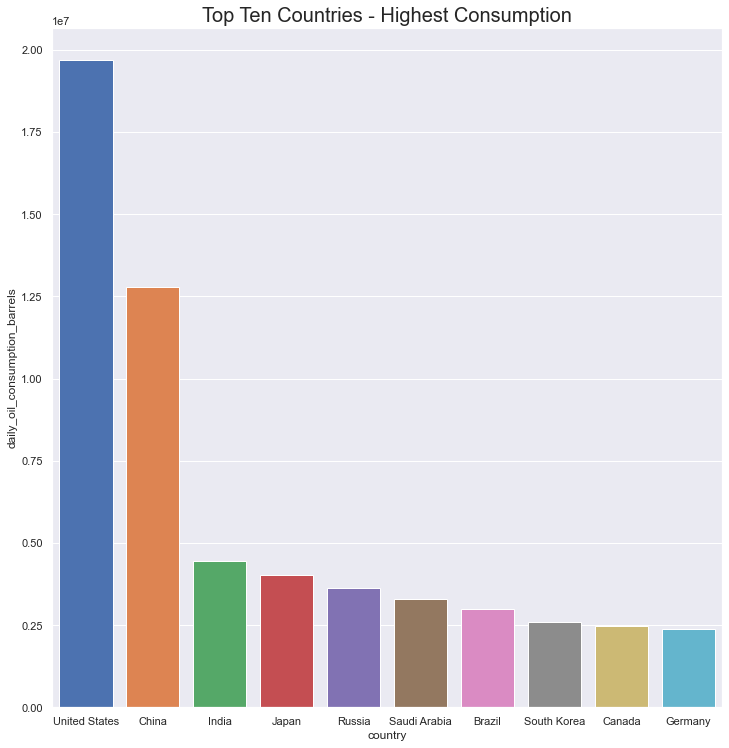

In [26]:
top_ten_consumption = gas_prices.nlargest(10, ['daily_oil_consumption_barrels'])
sns.barplot(x = 'country', y = 'daily_oil_consumption_barrels',
            data = top_ten_consumption, capsize = 1.5, saturation = 8, errcolor = 'gray', errwidth = 1,
            ci = 'sd')
plt.title("Top Ten Countries - Highest Consumption", fontsize =20)


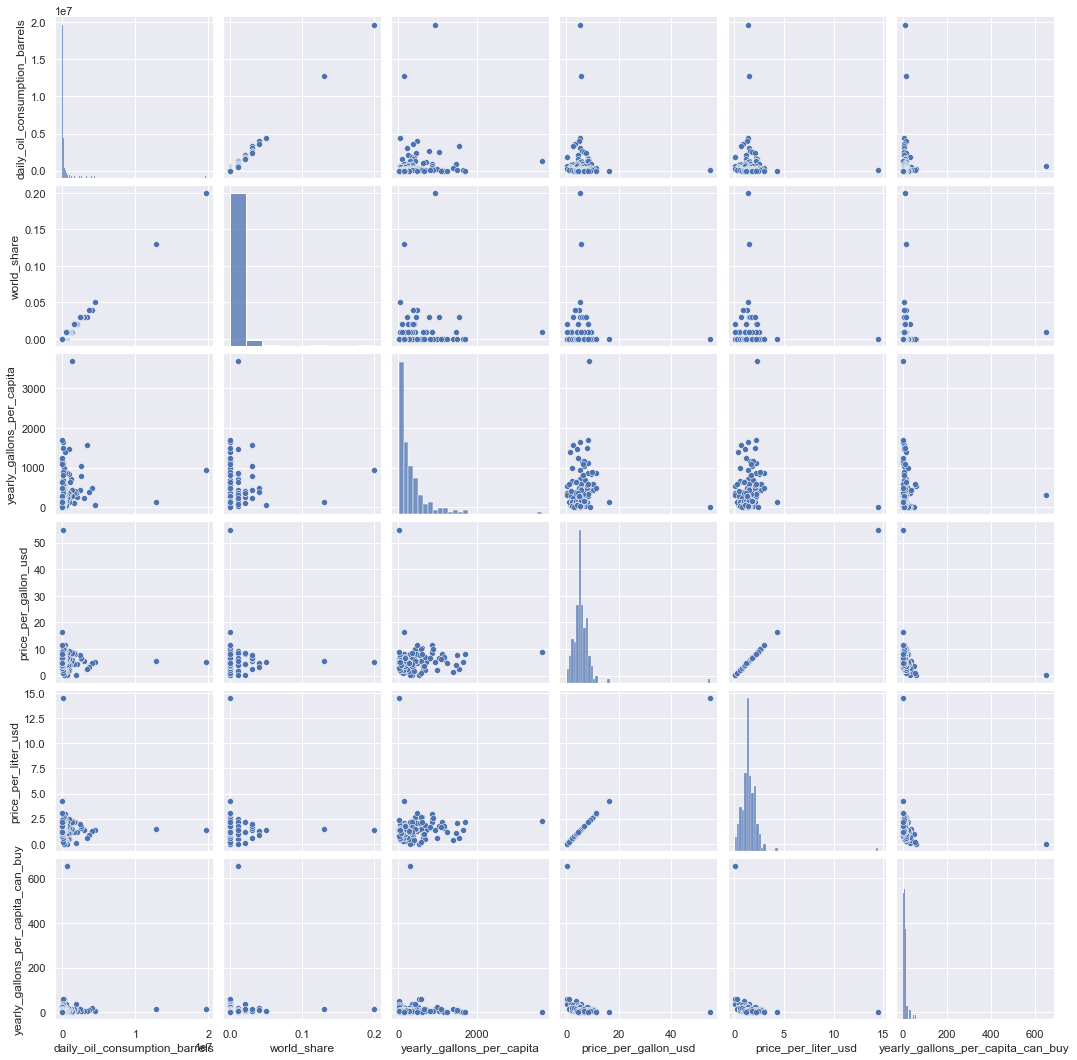

In [16]:
sns.pairplot(gas_prices)

# Analysis

In [17]:
gas_prices.dtypes

country                               object
daily_oil_consumption_barrels          int32
world_share                          float64
yearly_gallons_per_capita            float64
price_per_gallon_usd                 float64
price_per_liter_usd                  float64
gdp_per_capita_usd                    object
gallons_gdp_per_capita_can_buy        object
yearly_gallons_per_capita_can_buy      int64
dtype: object

In [18]:
gas_prices['gdp_per_capita_usd'] = gas_prices['gdp_per_capita_usd'].astype(float)


In [19]:
x= gas_prices[['daily_oil_consumption_barrels', 'yearly_gallons_per_capita_can_buy']].values
## .reshape(-1,1) # predictors
y= gas_prices['price_per_gallon_usd'].values # target

print(x)
#print(y)

[[19687287       13]
 [12791553       14]
 [ 4443000        7]
 [ 4012877       18]
 [ 3631287        8]
 [ 3302000        5]
 [ 2984000        6]
 [ 2605440        7]
 [ 2486301        6]
 [ 2383393       14]
 [ 2052607        7]
 [ 1803999       35]
 [ 1705568       12]
 [ 1623000        9]
 [ 1583896       13]
 [ 1357000        2]
 [ 1236628       13]
 [ 1290063        8]
 [ 1302000        4]
 [ 1114645       14]
 [  981203       10]
 [  941861        8]
 [  937098        7]
 [  877000       13]
 [  896000        6]
 [  857000        6]
 [  708000       17]
 [  709000        9]
 [  631522        6]
 [  640000        5]
 [  598000      654]
 [  582161       10]
 [  556000        7]
 [  478000        7]
 [  428000       38]
 [  357000       21]
 [  429000       17]
 [  359000       14]
 [  429000        9]
 [  351989        8]
 [  408491        5]
 [  325000       18]
 [  262352       13]
 [  322109       12]
 [  246000        8]
 [  244000        7]
 [  259000        5]
 [  296101   

In [20]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state=0)

In [21]:
model = LinearRegression().fit(x_train, y_train)
print(model.intercept_) 
print(model.coef_) 


7.5746012972117125
[-3.65714309e-08 -1.49828790e-01]


In [22]:
prediction = model.predict(x_test) 
print(prediction)

[  6.07309511   6.4305151    6.21944962   6.97513982   6.2254473
   6.07071797   6.52510162   2.03031034   7.42450557   6.5244832
   6.50831863   6.52556205   4.12831967   6.70469848   6.92767014
   5.77588782   6.07550887   6.97451814   5.4638691    7.12314007
   5.76801586   7.12471261   5.32490202   6.24316962   6.2242039
   6.36828988   6.97382328   5.92637486   7.26934829   6.52578514
   6.36697441   5.0016193    5.3271241    6.07569169   6.22456962
   6.58470097   5.77007457   6.97455471   6.51687634   6.82450649
   7.27491958   6.64286056 -90.4352969    6.82333621   5.76934153
   3.97865552   6.52442125   5.43623408   6.22533762   6.971117
   5.02730707   5.58160178   4.12224885   5.77314496   6.97426214]


In [23]:
# remove outliers 
prediction = list(prediction)
for i in prediction:
    if i < 0:
        pos=prediction.index(i)
        prediction[pos] = 0

In [24]:
rsc = model.score(x_test, y_test)
rsc

-32.72170036721774

Text(0, 0.5, 'Predicted')

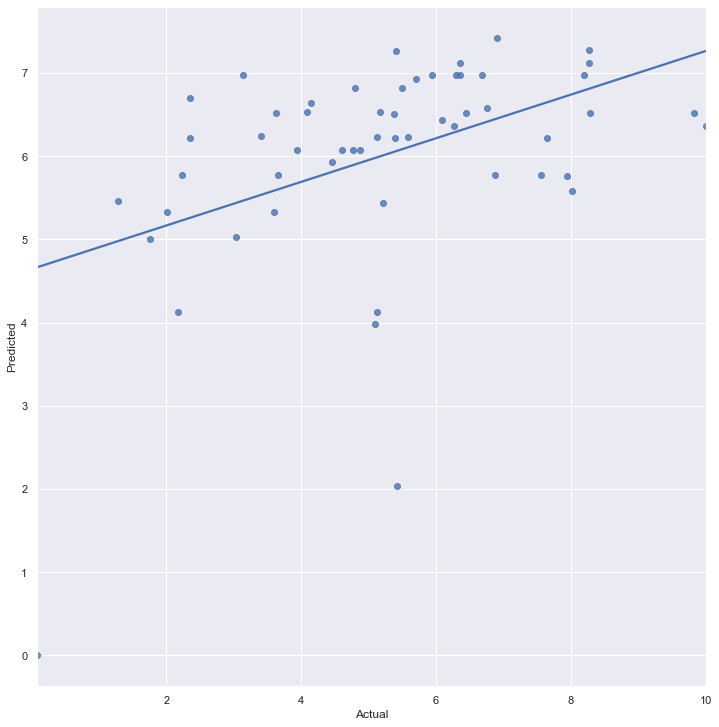

In [25]:
sns.regplot(x=y_test, y=prediction, ci=None, color="b")
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Takeaway


price increases as daily oil consumption and yearly gallons per capita increase. r2 score indicates that the model is not accurate and/or does not depend on the metrics used. 